<h1 style="color:#27469c"> Preprocessing of ESB Cooling Towers 1 and 2 data </h1>


<h1 style="color:#27469c">ESB Cooling Tower 1</h1>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from mlxtend import plotting
import preprocessor

import warnings
warnings.filterwarnings('ignore')

rootpath = ".."

In [12]:
# load cooling tower data
df = pd.read_csv(f'{rootpath}/data/esb/esb_cooling_tower_1.csv', index_col='time')
df.index = pd.to_datetime(df.index, utc='True')

initial_data_size = df.shape[0]

<h3 style="color:#27469c">Missing data removal</h3>

In [13]:
df = preprocessor.remove_missing_data(datadf=df, initial_data_size=initial_data_size, threshold=0.1)

In [14]:
# also consider 0 temperatures of water as missing data
df = df[~(df['ESB_Tower_1 enteringWaterTemp']==0)]
df = df[~(df['ESB_Tower_1 leavingWaterTemp']==0)]
print(f"After missing data removal, we are left with us with {df.shape[0]} rows out of {initial_data_size}.")

After missing data removal, we are left with us with 84919 rows out of 104976.


<h3 style="color:#27469c">Condensing and renaming columns</h3>

In [15]:
print(f"Cell_1aFan vfdPercent != Cell_1bFan vfdPercent in {df[~(df['Cell_1aFan vfdPercent'] == df['Cell_1bFan vfdPercent'])].shape[0]} cases.")

# since the vfdPercent columns have identical values, replace them with a single column
df["ESB_Tower_1 vfdPercent"] = df["Cell_1aFan vfdPercent"]

# using fan status as an indicator of the cooling tower being on or off
df["ESB_Tower_1 fanStatus"] = df["Cell_1bFan fanStatus"] | df["Cell_1aFan fanStatus"]

df = df.drop(["Cell_1aFan vfdPercent", "Cell_1bFan vfdPercent", "Cell_1aFan fanStatus", "Cell_1bFan fanStatus", "Cell_1aFan fanOnOff", "Cell_1bFan fanOnOff"], axis=1)
df.rename(columns={"Cell_1aFan vfdPower" : "ESB_Tower_1 fanA_vfdPower", "Cell_1bFan vfdPower" : "ESB_Tower_1 fanB_vfdPower"}, inplace=True)

Cell_1aFan vfdPercent != Cell_1bFan vfdPercent in 0 cases.


<h3 style="color:#27469c">Convert to SI Units</h3>
This may not be required for the transfer learning problem unless I'm doing data imputation (which I haven't needed to do yet.)

If needed, follow this code:

```
from bdx import apply_heuristics

df, left = apply_heuristics(df)
print('The following fields did not match and were not converted to SI units:', left)
```


<h3 style="color:#27469c">Add efficiency and season columns + additional features</h3>

In [16]:
preprocessor.create_efficiency_col(datadf=df, enteringWaterTemp="ESB_Tower_1 enteringWaterTemp", leavingWaterTemp='ESB_Tower_1 leavingWaterTemp', outdoorAirWetBulb='ESB_Tower_1 outdoorAirWetBulb', efficiency_col_name='ESB_Tower_1 efficiency')

preprocessor.create_season_col(datadf=df, season_col_name="ESB_Tower_1 season")

df["ESB_Tower_1 dayOfWeek"] = df.index.weekday

df['ESB_Tower_1 hourOfDay'] = df.index.hour

<h3 style="color:#27469c">Outliers</h3>

In [17]:
# df = preprocessor.remove_outliers_std(df, threshold=3, has_off_data=True,on_condition=df['ESB_Tower_1 fanStatus'], verbose=True)

In [18]:
# save preprocessed tower 1 data
df.sort_index(axis=1).to_csv(f'{rootpath}/data/esb/esb_tower_1_preprocessed.csv')

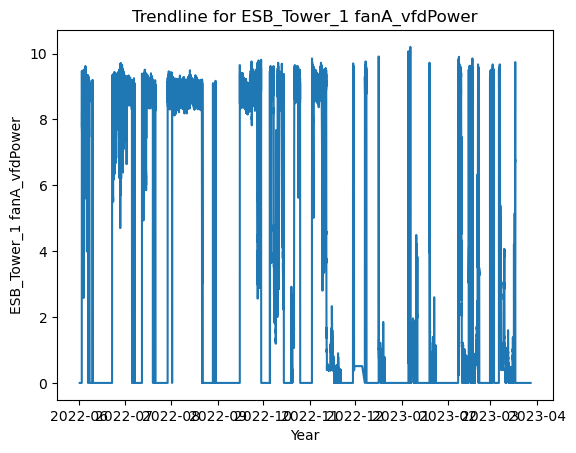

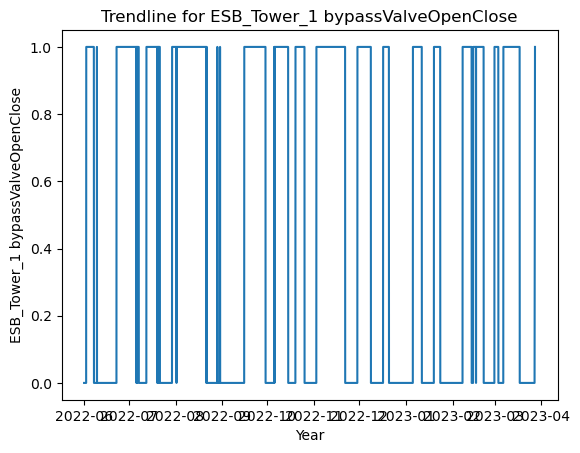

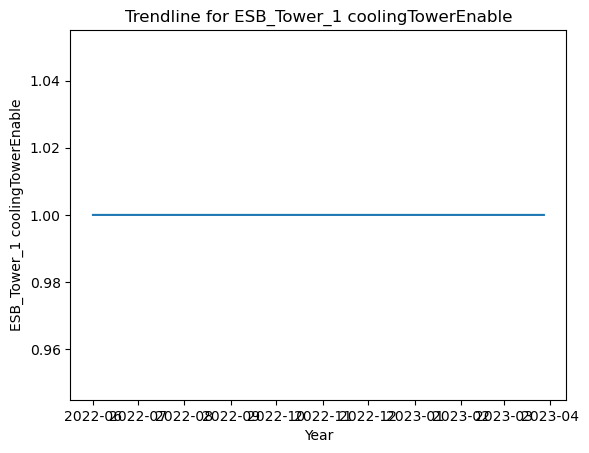

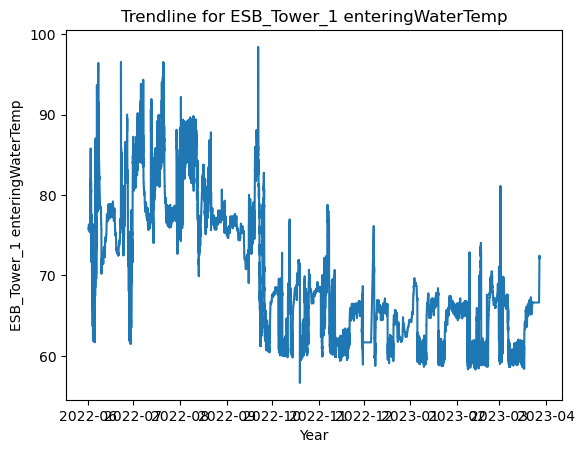

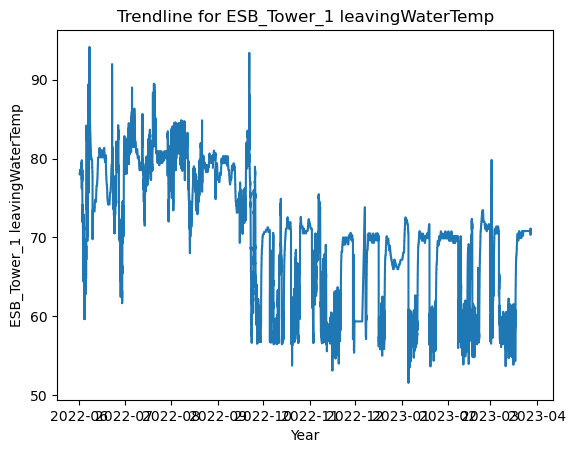

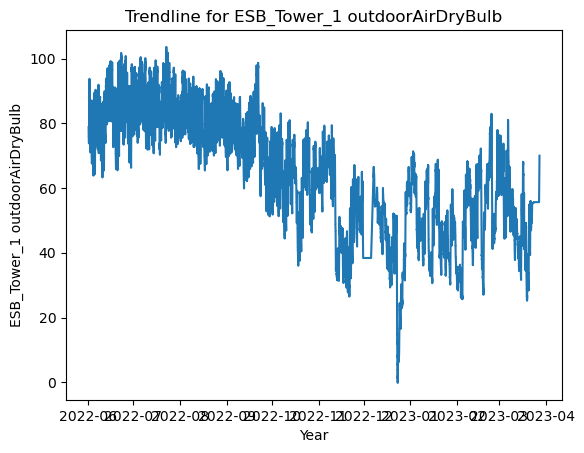

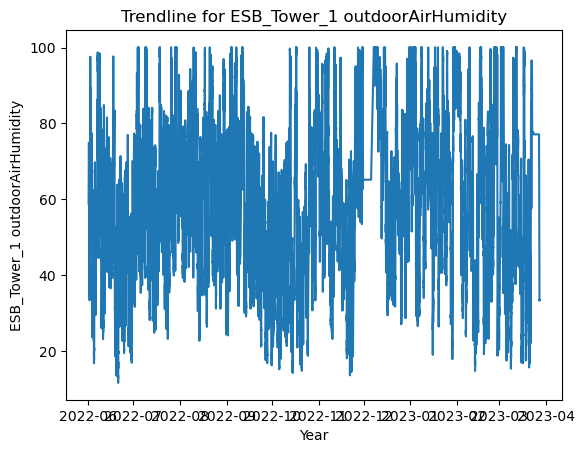

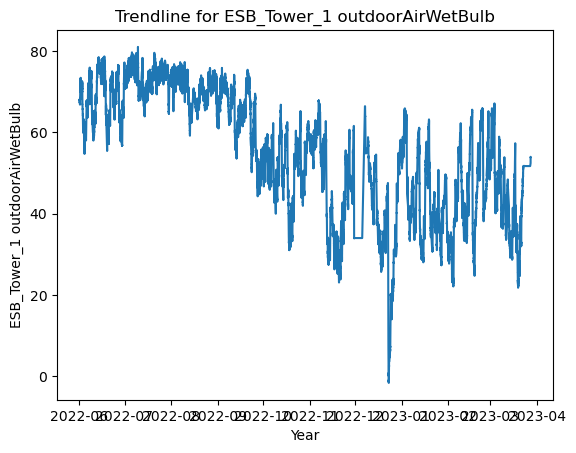

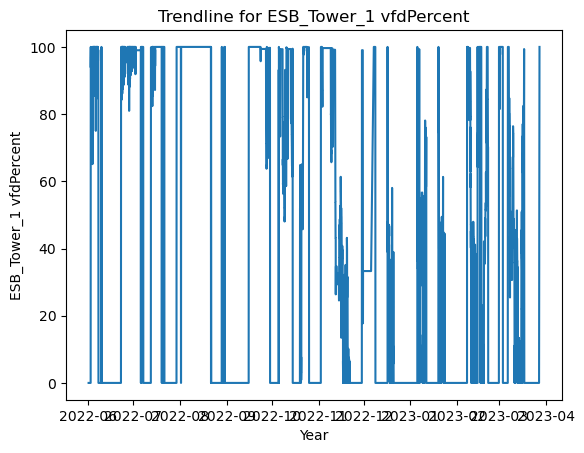

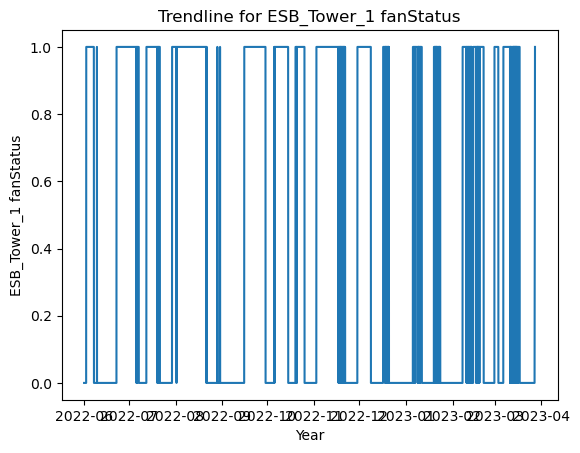

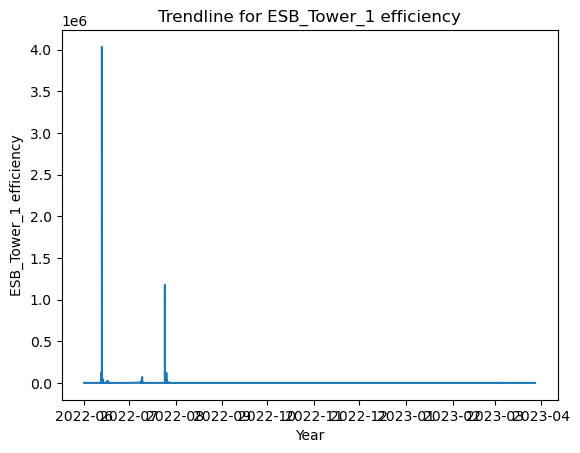

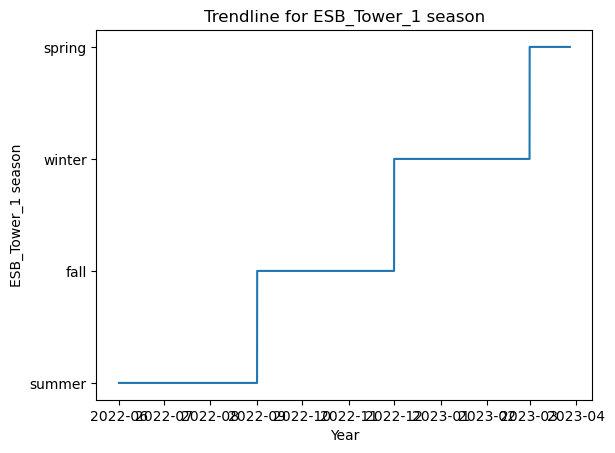

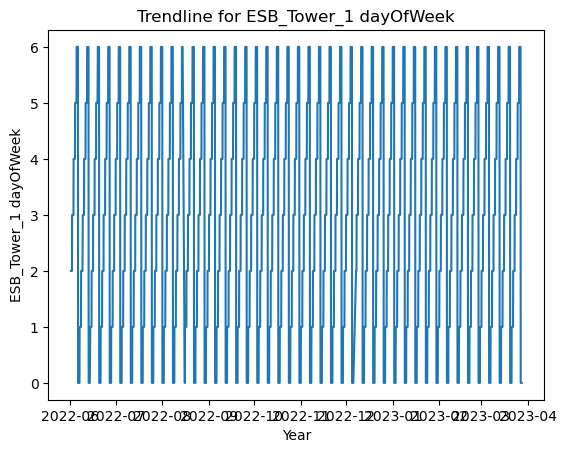

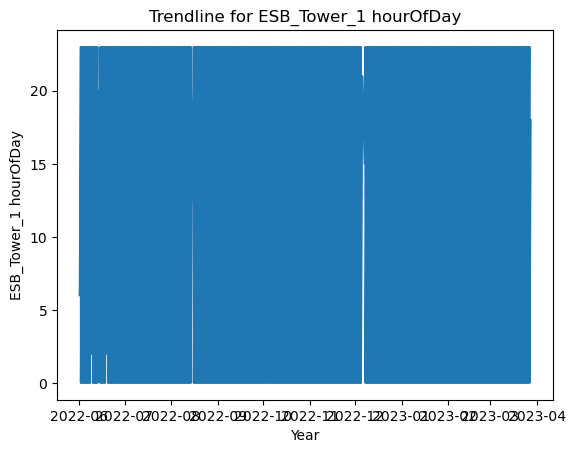

In [19]:
import matplotlib.pyplot as plt
# Iterate through the columns and create a separate figure for each
for column in df.columns[1:]:
    plt.figure()  # Create a new figure
    plt.plot(df.index, df[column])
    plt.title(f'Trendline for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)

plt.show()

<h1 style="color:#27469c">ESB Cooling Tower 2</h1>

Replicate the same steps as for cooling tower 1

In [20]:
# load cooling tower 2 data
df = pd.read_csv(f'{rootpath}/data/esb/esb_cooling_tower_2.csv', index_col='time')
df.index = pd.to_datetime(df.index, utc='True')

initial_data_size = df.shape[0]


# missing data removal
df = preprocessor.remove_missing_data(datadf=df, initial_data_size=initial_data_size, threshold=0.1)

# column renaming
print(f"Cell_2aFan vfdPercent != Cell_2bFan vfdPercent in {df[~(df['Cell_2aFan vfdPercent'] == df['Cell_2bFan vfdPercent'])].shape[0]} cases.")
# ESB Tower 2 has 3 cases in which Cell_2aFan and Cell_2bFan have different values but this can be ignored
df["ESB_Tower_2 vfdPercent"] = df["Cell_2aFan vfdPercent"]
df["ESB_Tower_2 fanStatus"] = df["Cell_2bFan fanStatus"] | df["Cell_2aFan fanStatus"]
df = df.drop(["Cell_2aFan vfdPercent", "Cell_2bFan vfdPercent", "Cell_2aFan fanStatus", "Cell_2bFan fanStatus", "Cell_2aFan fanOnOff", "Cell_2bFan fanOnOff"], axis=1)
df.rename(columns={"Cell_2aFan vfdPower" : "ESB_Tower_2 fanA_vfdPower", "Cell_2bFan vfdPower" : "ESB_Tower_2 fanB_vfdPower"}, inplace=True)

# consider 0 temperatures of water as missing data
df = df[~(df['ESB_Tower_2 enteringWaterTemp']==0)]
df = df[~(df['ESB_Tower_2 leavingWaterTemp']==0)]
print(f"After missing data removal, we are left with us with {df.shape[0]} rows out of {initial_data_size}.")

# add efficiency, season, dayOfWeek and hourOfDay columns
preprocessor.create_efficiency_col(datadf=df, enteringWaterTemp="ESB_Tower_2 enteringWaterTemp", leavingWaterTemp='ESB_Tower_2 leavingWaterTemp', outdoorAirWetBulb='ESB_Tower_2 outdoorAirWetBulb', efficiency_col_name='ESB_Tower_2 efficiency')
preprocessor.create_season_col(datadf=df, season_col_name="ESB_Tower_2 season")
df["ESB_Tower_2 dayOfWeek"] = df.index.weekday
df['ESB_Tower_2 hourOfDay'] = df.index.hour

# outlier removal
# df = preprocessor.remove_outliers_std(df, threshold=5, has_off_data=True, on_condition=df['ESB_Tower_2 fanStatus'], verbose=True)

# save preprocessed tower 2 data
df.sort_index(axis=1).to_csv(f'{rootpath}/data/esb/esb_tower_2_preprocessed.csv')

Cell_2aFan vfdPercent != Cell_2bFan vfdPercent in 3 cases.
After missing data removal, we are left with us with 84919 rows out of 104976.
